IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

OUHENIA Ghiles - YEHYA Jad

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




# Problèmatique d'apprentissage supervisé

In [160]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

import seaborn as sns
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [161]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [162]:
data_synthese.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


In [163]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [164]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


In [165]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [166]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


# DEBUT

In [167]:
data_synthese


,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,19592,19592,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, wit...",mix de consommation FR,0,Glacé,PP,...,0.173049,0.022129,0.092536,0.257436,15.198522,136.090810,216.954380,2.253106,26.865322,5.020883
2475,19593,19593,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, plain",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2476,19594,19594,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2477,19598,19598,lait et produits laitiers,produits laitiers frais et assimilés,"Yaourt, lait fermenté ou spécialité laitière, ...","Yogurt, fermented milk or dairy specialty, pla...",mix de consommation FR,0,Glacé,PP,...,0.165113,0.023417,0.097687,0.297081,14.777646,138.486420,32.692803,0.862339,27.136623,2.858934


D’après les recommendations de Agribalyse, nous avons décidé de ne pas prendre en compte les exemples avec un DQR > 3 car la qualité des données n’est pas assez fiable.

In [168]:
data_synthese = data_synthese[data_synthese["DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)"] <= 3]
first_data = data_synthese

In [169]:
print(data_synthese.dtypes[data_synthese.dtypes == "object"])

Code AGB                      object
Groupe d'aliment              object
Sous-groupe d'aliment         object
Nom du Produit en Français    object
LCI Name                      object
Saisonnalité                  object
Livraison                     object
Matériau d'emballage          object
Préparation                   object
dtype: object


In [170]:
# on convertit les colonnes de type object en variables numeriques
for i in (data_synthese.dtypes[data_synthese.dtypes == "object"]).index:
    if i != "Groupe d'aliment":
        data_synthese[i].replace(np.unique(data_synthese[i]), range(0,len(np.unique(data_synthese[i]))), inplace=True)

data_synthese

Label = data_synthese["Groupe d'aliment"].unique()
data_synthese["Groupe d\'aliment"].replace(Label, range(0,len(Label)), inplace=True)

/Users/jadyehya/opt/anaconda3/envs/Anaconda_env/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


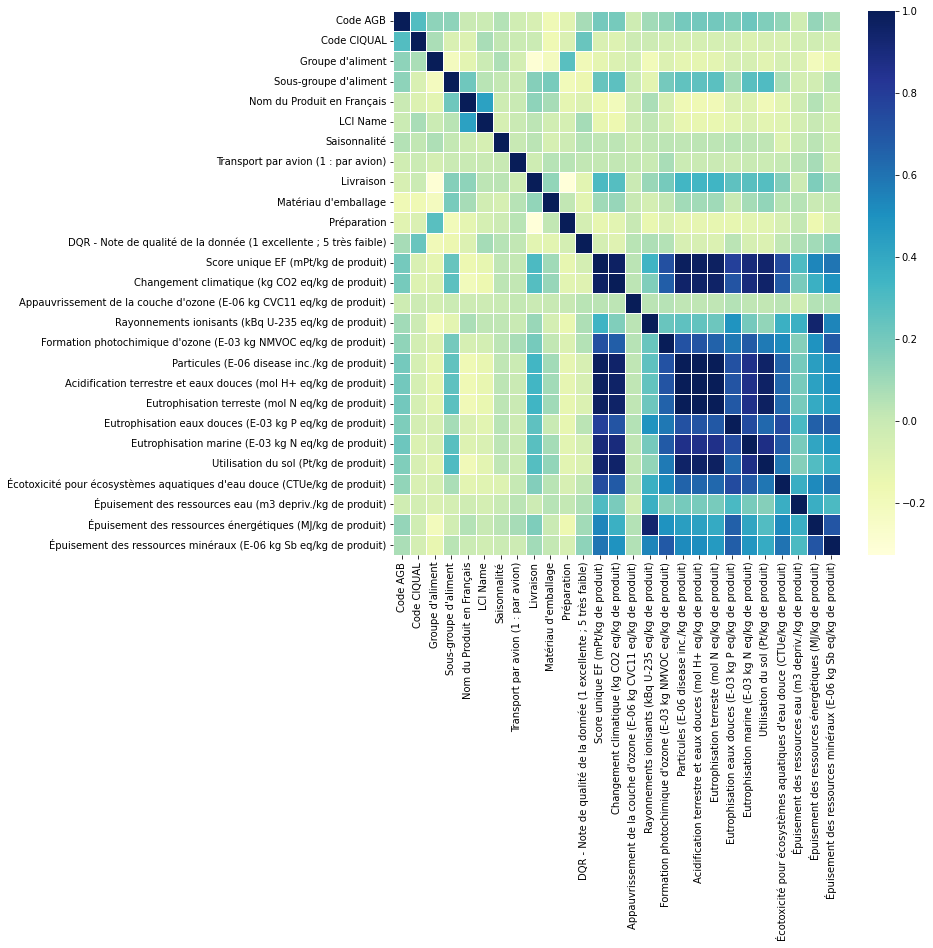

In [171]:
corr = data_synthese.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap="YlGnBu", annot=False, linewidths=0.5)
plt.show()

D'après la documentation de Agribalyse, nous avons décidé de drop les colonnes suivantes :
- Code AGB
- Code ciqual
- DQR

D'après notre analyse de la matrice de corrélation, nous avons décidé de drop les colonnes suivantes :
- LCI name
- Nom du produit en français

In [172]:
attributs_a_drop = ["Code AGB", "Code CIQUAL", "DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)", "LCI Name", "Nom du Produit en Français"]
data_synthese = data_synthese.drop(attributs_a_drop, axis=1)
df = data_synthese

## On va essayer de classifier les données en utilisant l'attribut Score EF comme label.

Pour cela, nous allons discrétiser l'attribut score EF en 3 classes.

In [173]:
# normalisation des données pour avoir une distribution uniforme entre 0 et 1
data_synthese = clust.normalisation(data_synthese)
first_data = data_synthese
data_synthese

,Groupe d'aliment,Sous-groupe d'aliment,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,Préparation,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,0.0,0.408163,1.0,0.0,0.5,0.000000,0.8,0.034416,0.019137,0.000983,...,0.014908,0.009717,0.007506,0.041888,0.007049,0.030048,0.049305,0.067855,0.057452,0.039748
1,0.0,0.408163,1.0,0.0,0.5,0.000000,0.8,0.020053,0.009428,0.000595,...,0.009085,0.005937,0.004584,0.023606,0.003677,0.027060,0.028345,0.065336,0.034780,0.024096
2,0.0,0.408163,1.0,0.0,0.5,0.000000,0.8,0.034416,0.019137,0.000983,...,0.014908,0.009717,0.007506,0.041888,0.007049,0.030048,0.049305,0.067855,0.057452,0.039748
3,0.0,0.408163,1.0,0.0,0.5,0.000000,0.7,0.020053,0.009428,0.000595,...,0.009085,0.005937,0.004584,0.023606,0.003677,0.027060,0.028345,0.065336,0.034780,0.024096
4,0.0,0.408163,1.0,0.0,0.5,0.588235,0.7,0.018554,0.013406,0.000332,...,0.009422,0.007552,0.006121,0.020359,0.004374,0.029874,0.032934,0.066970,0.019182,0.029006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.5,0.734694,1.0,0.0,1.0,0.647059,0.7,0.080123,0.097709,0.001218,...,0.037225,0.036265,0.033225,0.065496,0.131055,0.051177,0.100753,0.070450,0.042820,0.065837
1679,0.5,0.734694,1.0,0.0,1.0,0.647059,0.7,0.038437,0.038601,0.000611,...,0.024230,0.023863,0.022778,0.023619,0.065130,0.045646,0.019199,0.063815,0.030140,0.024296
1680,0.5,0.734694,1.0,0.0,1.0,0.647059,0.7,0.038437,0.038601,0.000611,...,0.024230,0.023863,0.022778,0.023619,0.065130,0.045646,0.019199,0.063815,0.030140,0.024296
1681,0.5,0.734694,1.0,0.0,1.0,0.647059,0.7,0.041840,0.042000,0.000697,...,0.025691,0.024644,0.023208,0.030046,0.070561,0.046587,0.025439,0.064732,0.031907,0.038637


In [174]:
# Remplacer toutes les valeurs <= 0.1 par 1
attr_label = "Score unique EF (mPt/kg de produit)"
data_synthese[data_synthese[attr_label] <= 0.1] = 1
data_synthese[data_synthese[attr_label] <=0.5] = 2
data_synthese[data_synthese[attr_label] < 1] = 3

In [175]:
data_synthese["Score unique EF (mPt/kg de produit)"].value_counts()

1.0    1129
2.0     488
3.0      66
Name: Score unique EF (mPt/kg de produit), dtype: int64

Le but était de discrétiser l'attribut score EF en 3 classes pour ensuite prédire la classe d'un produit cependant, il y'a beaucoup trop d'exemples de classe 1 ce qui ne nous permettera pas d'obtenir des résultats concluants.

## Problématique groupe d'aliments

In [176]:
df

,Groupe d'aliment,Sous-groupe d'aliment,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,Préparation,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,0,20,2,0,2,0,8,0.215366,1.221121,0.248176,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,0,20,2,0,2,0,8,0.128043,0.612234,0.153879,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,0,20,2,0,2,0,8,0.215366,1.221121,0.248176,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,0,20,2,0,2,0,7,0.128043,0.612234,0.153879,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,0,20,2,0,2,10,7,0.118929,0.861730,0.089663,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2469,5,36,2,0,4,11,7,0.493252,6.148202,0.305453,...,0.238594,0.034406,0.139738,0.636794,27.421783,164.478930,125.793240,2.269302,35.723963,4.795432
2475,5,36,2,0,4,11,7,0.239814,2.441674,0.157775,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2476,5,36,2,0,4,11,7,0.239814,2.441674,0.157775,...,0.155803,0.022678,0.095881,0.235488,13.642379,133.154710,24.979408,0.636518,25.746521,1.838004
2477,5,36,2,0,4,11,7,0.260504,2.654791,0.178569,...,0.165113,0.023417,0.097687,0.297081,14.777646,138.486420,32.692803,0.862339,27.136623,2.858934


In [177]:
df["Groupe d'aliment"].unique()
Y_groupe = df["Groupe d'aliment"]
X_groupe = df.drop(columns=["Groupe d'aliment", "Sous-groupe d'aliment"])

In [178]:
# On va maintenant faire un KNN
# On va diviser les données en deux groupes : les données de test et les données d'apprentissage (80% des données pour l'apprentissage et 20% pour le test)
pct_train = 0.3
liste = list(range(0,len(X_groupe)))
np.random.shuffle(liste)
# On va maintenant séparer les données en deux groupes
X_train = X_groupe.iloc[liste[0:int(len(X_groupe)*pct_train)]]
Y_train = Y_groupe.iloc[liste[0:int(len(X_groupe)*pct_train)]]
X_test = X_groupe.iloc[liste[int(len(X_groupe)*pct_train):]]
Y_test = Y_groupe.iloc[liste[int(len(X_groupe)*pct_train):]]

# Convert the header into numeric values
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
X_train

array([[ 2.        ,  0.        ,  1.        , ...,  3.6610712 ,
        33.484538  ,  5.9245939 ],
       [ 2.        ,  0.        ,  4.        , ...,  1.1639814 ,
        38.290289  ,  2.5043043 ],
       [ 2.        ,  0.        ,  4.        , ...,  0.63514488,
        26.181318  ,  1.9666204 ],
       ...,
       [ 2.        ,  0.        ,  3.        , ...,  0.87080906,
        30.672108  ,  3.1172211 ],
       [ 2.        ,  0.        ,  4.        , ...,  8.2545231 ,
        98.701818  , 12.285935  ],
       [ 2.        ,  0.        ,  1.        , ...,  0.71942783,
        38.867235  ,  1.3442245 ]])

### Classifier KNN

In [231]:
from tqdm import tqdm
accuracy = {'test' : {'KNN': {}}, 'train' : {'KNN': {}}}
# On va appliquer plusieurs KNN avec des k impairs variants de 1 à 5 inclus
# accuracy = {'KNN': {}}
voisins = [i for i in range(1, 10, 2)]
Knn_mc = [cl.ClassifierKNN_MC(len(X_train[0]), i, nb_classes=len(np.unique(Y_train))) for i in voisins]
for i in tqdm(range(len(Knn_mc))):
    Knn_mc[i].train(X_train, Y_train)
    accuracy['test']['KNN'][voisins[i]] = Knn_mc[i].accuracy(X_test, Y_test)
    accuracy['train']['KNN'][voisins[i]] = Knn_mc[i].accuracy(X_train, Y_train)

100%|██████████| 5/5 [00:29<00:00,  5.84s/it]


In [232]:
accuracy

{'test': {'KNN': {1: 0.731128074639525,
   3: 0.6726039016115352,
   5: 0.64715860899067,
   7: 0.6412213740458015,
   9: 0.6590330788804071}},
 'train': {'KNN': {1: 1.0,
   3: 0.8353174603174603,
   5: 0.753968253968254,
   7: 0.7301587301587301,
   9: 0.7242063492063492}}}

On remarque que les KNN sont assez performants pour classifier les données. Nous allons choisir le KNN avec 3 voisins pour classifier les données. Cela apportera plus de robustesse contre les outliers.

In [233]:
accuracy['test']['KNN'] = accuracy['test']['KNN'][3]
accuracy['train']['KNN'] = accuracy['train']['KNN'][3]

In [234]:
accuracy

{'test': {'KNN': 0.6726039016115352}, 'train': {'KNN': 0.8353174603174603}}

### Classifier Perceptron

In [235]:
# On va maintenant appliquer un perceptron multiclasses
perceptron = cl.ClassifierPerceptron_MC(len(X_train[0]), 0.01, len(np.unique(Y_train)), init=1)

In [236]:
perceptron.train(X_train, Y_train)

100%|██████████| 11/11 [00:14<00:00,  1.34s/it]


In [237]:

accuracy['train']['Perceptron'] = perceptron.accuracy(X_train, Y_train)
accuracy['test']['Perceptron'] = perceptron.accuracy(X_test, Y_test)
print("Accuracy train : ", accuracy['train']['Perceptron'])
print("Accuracy test : ", accuracy['test']['Perceptron'])

Accuracy train :  0.4384920634920635
Accuracy test :  0.42493638676844786


On remarque que le Perceptron est assez mauvais avec seulement 42% de précision sur les données de test.


### Classifier Bagging Tree

In [238]:
# On va maintenant appliquer un BaggingTree
Tree = cl.ClassifierArbreNumerique(X_train.shape[1], 0.3, LNoms=X_groupe.columns)
Tree.train(X_train, Y_train)

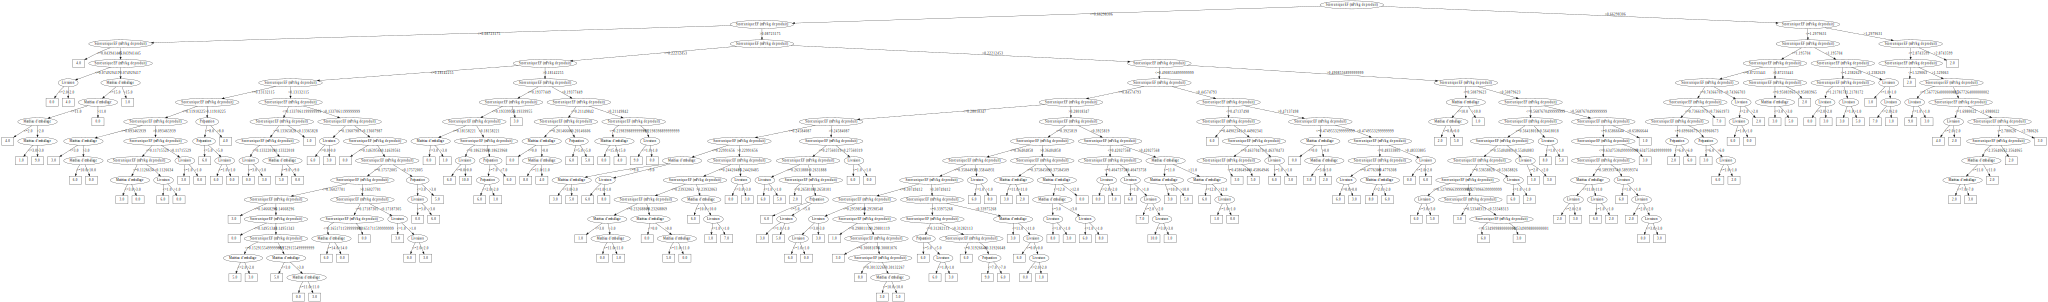

In [239]:
import graphviz as gv

# Construction de la représentation graphique (affichage)
graphe_arbre_1 = gv.Digraph(format='eps')
Tree.affiche(graphe_arbre_1)

# Affichage du graphe obtenu:
graphe_arbre_1

In [240]:
accuracy['test']['Tree'] = Tree.accuracy(X_test, Y_test)
accuracy['train']['Tree'] = Tree.accuracy(X_train, Y_train)
print("Accuracy train : ", accuracy['train']['Tree'])
print("Accuracy test : ", accuracy['test']['Tree'])

Accuracy train :  0.9940476190476191
Accuracy test :  0.6641221374045801


On remarque qu'il y'a un sur apprentissage avec le bagging tree, en effet la précision en train est beaucoup trop élevée par rapport à la précision en test. Malgré cela, on obtient un résultat assez bon qui s'apparente à celui de l'algorithme KNN et qui est meilleur que le Perceptron.
De plus, on a plusieurs d'explicabilités sur le bagging tree avec l'arbre de décision (Ce qu'on n'a pas avec les 2 autres algorithmes).

## Conclusion

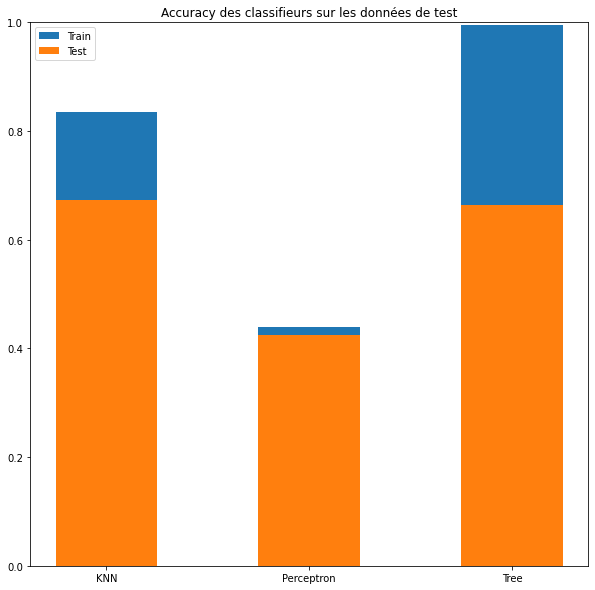

In [244]:
# Afficher les accuracys sur un barplot pour les différents classifieurs
plt.figure(figsize=(10, 10))
plt.bar(accuracy['train'].keys(), accuracy['train'].values(), width=0.5)
plt.bar(accuracy['test'].keys(), accuracy['test'].values(), width=0.5)
plt.title("Accuracy des classifieurs sur les données de test")
plt.ylim((0, 1))
plt.legend(["Train", "Test"])
plt.show()




Nous avons répondu a notre problématique et sommes maintenant capable de prédire le groupe d'aliments en fonction de ses autres attributs, et notamment de ses scores environnementaux.

On observe que le perceptron est bien moins performant que les 2 autres.
En ce qui concerne le KNN et le bagging Tree, ils ont des résultats très similaires sur les données de test mais on remarque que le bagging Tree nous donne des informations sur la manière de classification. 
La précision est de 0.66 sur les données de test, ce qui est en réalité plutôt bon puisqu'il y'a 11 classes différentes. Pour comparer, l'aléatoire n'aurait qu'une précision de 0.09.